# Kosovo Population Animation

## Preprocessing

In [14]:
import pandas as pd

df_mun = pd.read_csv("../data/kosovo-municipalities.csv")
df_pop = pd.read_csv("../data/2012-2018_population.csv", encoding = "ISO-8859-1", sep=";")

In [15]:
# Melt dataframe
df_pop.columns = ["komuna", "31-12-2012", "31-12-2013", "31-12-2014", "31-12-2015", "31-12-2016", "31-12-2017", "31-12-2018"]
df_pop = df_pop.melt(id_vars=["komuna"], var_name="year", value_name="population")

In [16]:
df_pop["year"] = df_pop["year"].apply(lambda x: x[-4:])

In [18]:
# remove special characters
df_pop.replace("ë", "e", inplace=True, regex=True)
df_pop.replace("ç", "c", inplace=True, regex=True)

In [19]:
df = pd.merge(df_pop, df_mun, how="left", left_on = "komuna", right_on = "nam")

In [20]:
df.to_csv("../data/population.csv")

## Shapefile

In [30]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [33]:
%matplotlib inline

In [40]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("../data/kosovo-shapefile/XK_EA_2018.shp")

In [41]:
len(sf.shapes())

40

In [42]:
sf.records()[1]

Record #1: ['Gjakovë']

In [47]:
df[["X", "Y"]].iloc[1,].values

array([20.36129406, 42.40550347])

## Plotting

In [61]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
#     id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
#         if (x_lim == None) & (y_lim == None):
#             x0 = np.mean(x)
#             y0 = np.mean(y)
#             plt.text(x0, y0, id, fontsize=10)
#         id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    # Extra points
    plt.scatter(df["X"], df["Y"], s=df["population"]/100)

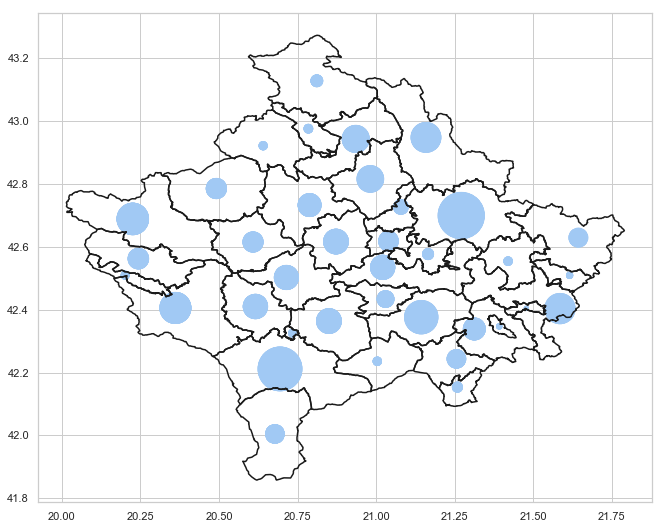

In [62]:
plot_map(sf)

In [ ]:
# https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html